In [1]:
# Mengimpor library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Mengimpor dataset (Pastikan Anda memiliki file CSV 'Posisi_gaji.csv' dalam direktori yang sama)
dataset = pd.read_csv('Posisi_gaji.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values  # Ubah menjadi satu kolom saja

In [3]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1, 1))
y = sc_y.fit_transform(y.reshape(-1, 1))

In [4]:
# Fitting SVR ke dataset
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

/tmp/ipython-input-1841224750.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)


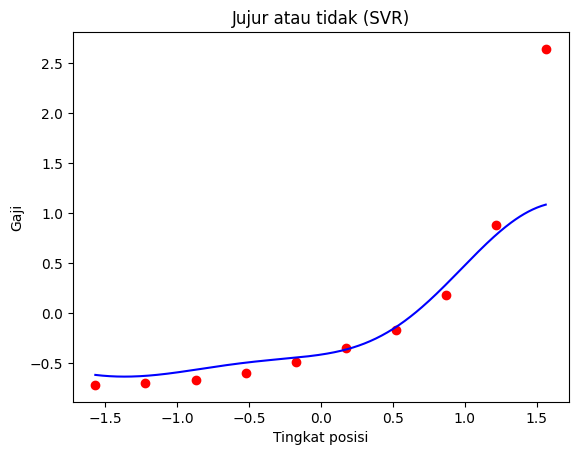

In [5]:
# Visualisasi hasil SVR (resolusi tinggi dan kurva yang lebih halus)
X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('Jujur atau tidak (SVR)')
plt.xlabel('Tingkat posisi')
plt.ylabel('Gaji')
plt.show()

In [6]:
# Prediksi hasil
# Buat array 2D yang berisi tingkat posisi yang akan diprediksi
tingkat_posisi_prediksi = np.array([[6.5]])
# Penskalaan fitur untuk data yang akan diprediksi
tingkat_posisi_prediksi = sc_X.transform(tingkat_posisi_prediksi)
# Melakukan prediksi menggunakan model SVR
gaji_prediksi = regressor.predict(tingkat_posisi_prediksi)
# Kembalikan hasil prediksi ke skala aslinya
gaji_prediksi = sc_y.inverse_transform(gaji_prediksi.reshape(-1, 1))

In [7]:
# Menampilkan hasil prediksi
print("Prediksi Gaji untuk Tingkat Posisi 6.5:", gaji_prediksi[0])

Prediksi Gaji untuk Tingkat Posisi 6.5: [170370.0204065]


Prediksi Gaji untuk Tingkat Posisi 6.5: 170370.02040650236


/tmp/ipython-input-3621307335.py:52: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X_scaled), max(X_scaled), 0.01)


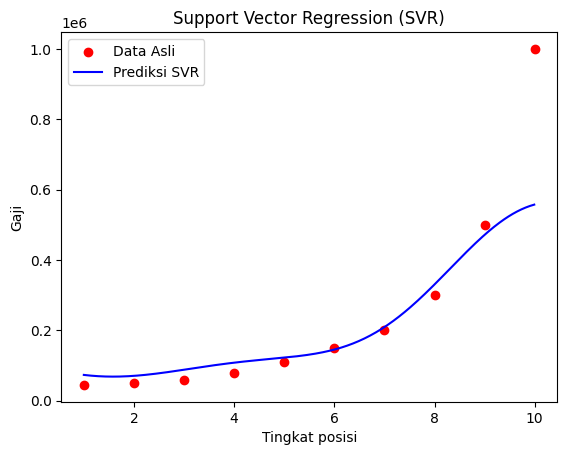

In [9]:
# Import library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# ------------------------------
# 1. Membaca dataset
# ------------------------------
# Contoh dataset (Posisi dan Gaji)
data = {
    "Tingkat_posisi": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Gaji": [45000, 50000, 60000, 80000, 110000, 150000, 200000, 300000, 500000, 1000000]
}
dataset = pd.DataFrame(data)

X = dataset[['Tingkat_posisi']].values  # fitur (independen)
y = dataset['Gaji'].values              # target (dependen)

# ------------------------------
# 2. Feature Scaling (Wajib untuk SVR)
# ------------------------------
sc_X = StandardScaler()
sc_y = StandardScaler()

X_scaled = sc_X.fit_transform(X)
y_scaled = sc_y.fit_transform(y.reshape(-1, 1)).flatten()

# ------------------------------
# 3. Membuat dan Melatih Model SVR
# ------------------------------
svr_model = SVR(kernel='rbf')
svr_model.fit(X_scaled, y_scaled)

# ------------------------------
# 4. Prediksi untuk tingkat posisi 6.5
# ------------------------------
posisi_prediksi = 6.5
y_pred_scaled = svr_model.predict(sc_X.transform([[posisi_prediksi]]))
y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
print(f"Prediksi Gaji untuk Tingkat Posisi {posisi_prediksi}: {y_pred[0][0]}")

# ------------------------------
# 5. Visualisasi Hasil
# ------------------------------
# Plot data asli
plt.scatter(sc_X.inverse_transform(X_scaled), sc_y.inverse_transform(y_scaled.reshape(-1, 1)),
            color='red', label='Data Asli')

# Membuat garis prediksi halus
X_grid = np.arange(min(X_scaled), max(X_scaled), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.plot(sc_X.inverse_transform(X_grid),
         sc_y.inverse_transform(svr_model.predict(X_grid).reshape(-1, 1)),
         color='blue', label='Prediksi SVR')

# Judul dan label
plt.title('Support Vector Regression (SVR)')
plt.xlabel('Tingkat posisi')
plt.ylabel('Gaji')
plt.legend()
plt.show()


In [10]:
# Evaluasi model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_actual = y
y_pred = regressor.predict(X)

# Menghitung MAE
mae = mean_absolute_error(y_actual, y_pred)

# Menghitung MSE
mse = mean_squared_error(y_actual, y_pred)

# Menghitung RMSE
rmse = np.sqrt(mse)

# Menghitung R-squared
r2 = r2_score(y_actual, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 249499.82930259855
MSE: 142912478455.3738
RMSE: 378037.6680376888
R-squared: -0.7717393012886922
